In [ ]:
df = pd.read_csv('/content/Insurance.csv')

In [ ]:
#importing all the relevant packages to be used

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
# Dropping the first column

df = df.iloc[:, 1:]
print(df)

      City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0            C3         3213            Rented          Individual         36   
1            C5         1117             Owned               Joint         75   
2            C5         3732             Owned          Individual         32   
3           C24         4378             Owned               Joint         52   
4            C8         2190            Rented          Individual         44   
...         ...          ...               ...                 ...        ...   
50877        C4          845            Rented          Individual         22   
50878        C5         4188            Rented          Individual         27   
50879        C1          442            Rented          Individual         63   
50880        C1            4             Owned               Joint         71   
50881        C3         3866            Rented          Individual         24   

       Lower_Age Is_Spouse 

In [ ]:
#Describing data

print(df)
print(df.describe())
print(df.info())
print(df.isnull().sum())

      City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0            C3         3213            Rented          Individual         36   
1            C5         1117             Owned               Joint         75   
2            C5         3732             Owned          Individual         32   
3           C24         4378             Owned               Joint         52   
4            C8         2190            Rented          Individual         44   
...         ...          ...               ...                 ...        ...   
50877        C4          845            Rented          Individual         22   
50878        C5         4188            Rented          Individual         27   
50879        C1          442            Rented          Individual         63   
50880        C1            4             Owned               Joint         71   
50881        C3         3866            Rented          Individual         24   

       Lower_Age Is_Spouse 

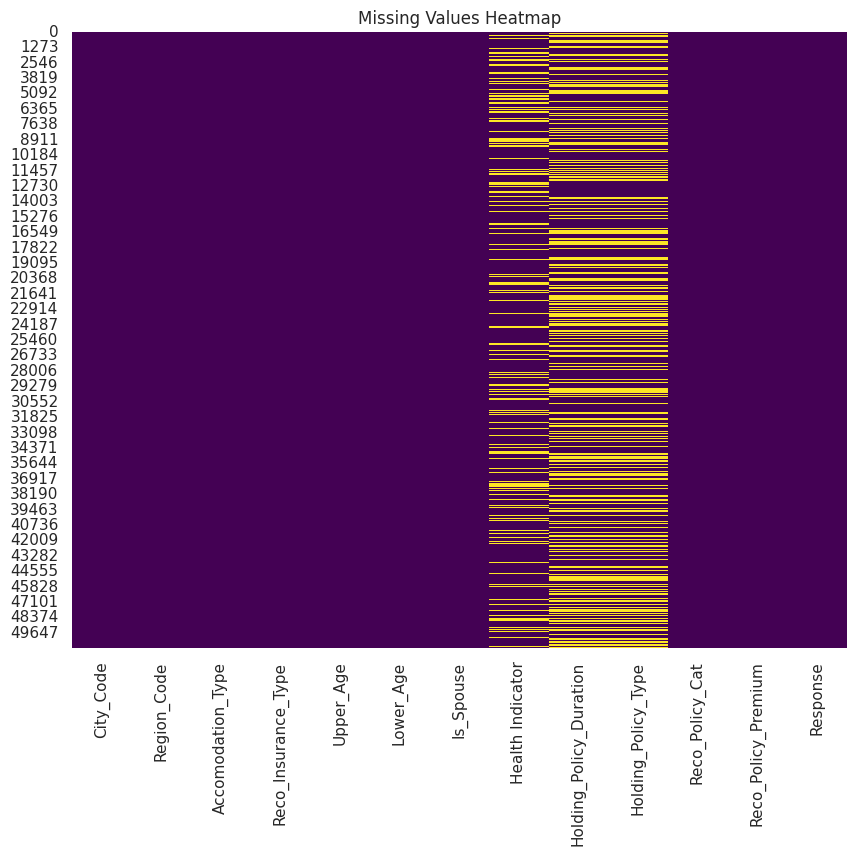

In [ ]:
#****** Heatmap to visualise missing values ******
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
#****** missing values percentage calculation ******
missing_percentage = df.isnull().mean() * 100
missing_info = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentage})
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)
print(missing_info)

                                          Column  Missing Percentage
Holding_Policy_Duration  Holding_Policy_Duration           39.799929
Holding_Policy_Type          Holding_Policy_Type           39.799929
Health Indicator                Health Indicator           22.976691
City_Code                              City_Code            0.000000
Region_Code                          Region_Code            0.000000
Accomodation_Type              Accomodation_Type            0.000000
Reco_Insurance_Type          Reco_Insurance_Type            0.000000
Upper_Age                              Upper_Age            0.000000
Lower_Age                              Lower_Age            0.000000
Is_Spouse                              Is_Spouse            0.000000
Reco_Policy_Cat                  Reco_Policy_Cat            0.000000
Reco_Policy_Premium          Reco_Policy_Premium            0.000000
Response                                Response            0.000000


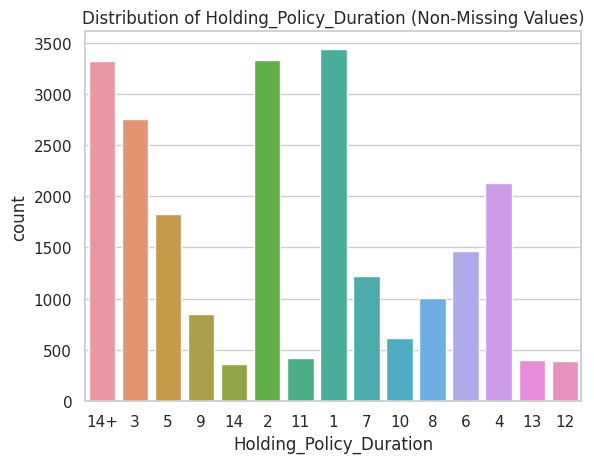

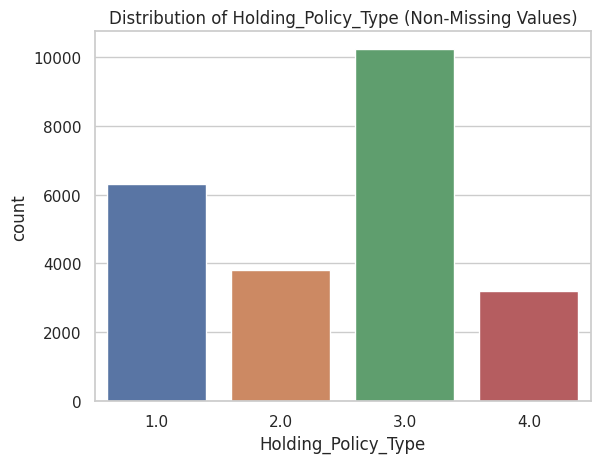

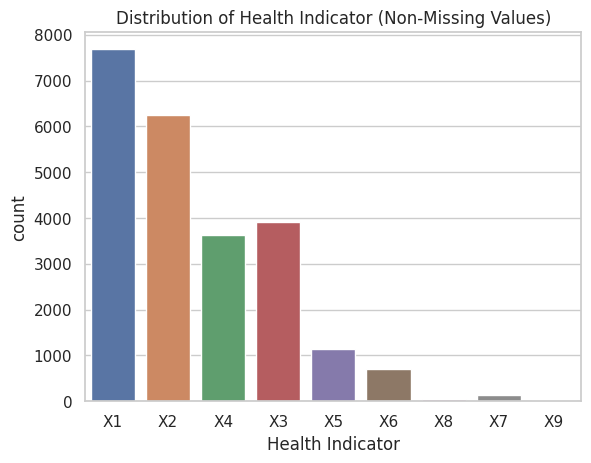

In [ ]:
#****** Countplot for Non-Missing Values ******

# Holding_Policy_Duration
sns.countplot(x='Holding_Policy_Duration', data=df.dropna())
plt.title('Distribution of Holding_Policy_Duration (Non-Missing Values)')
plt.show()
# Holding_Policy_Type
sns.countplot(x='Holding_Policy_Type', data=df.dropna())
plt.title('Distribution of Holding_Policy_Type (Non-Missing Values)')
plt.show()
# Health Indicator
sns.countplot(x='Health Indicator', data=df.dropna())
plt.title('Distribution of Health Indicator (Non-Missing Values)')
plt.show()

In [ ]:
# Dropping rows with missing values

df.dropna(inplace=True)

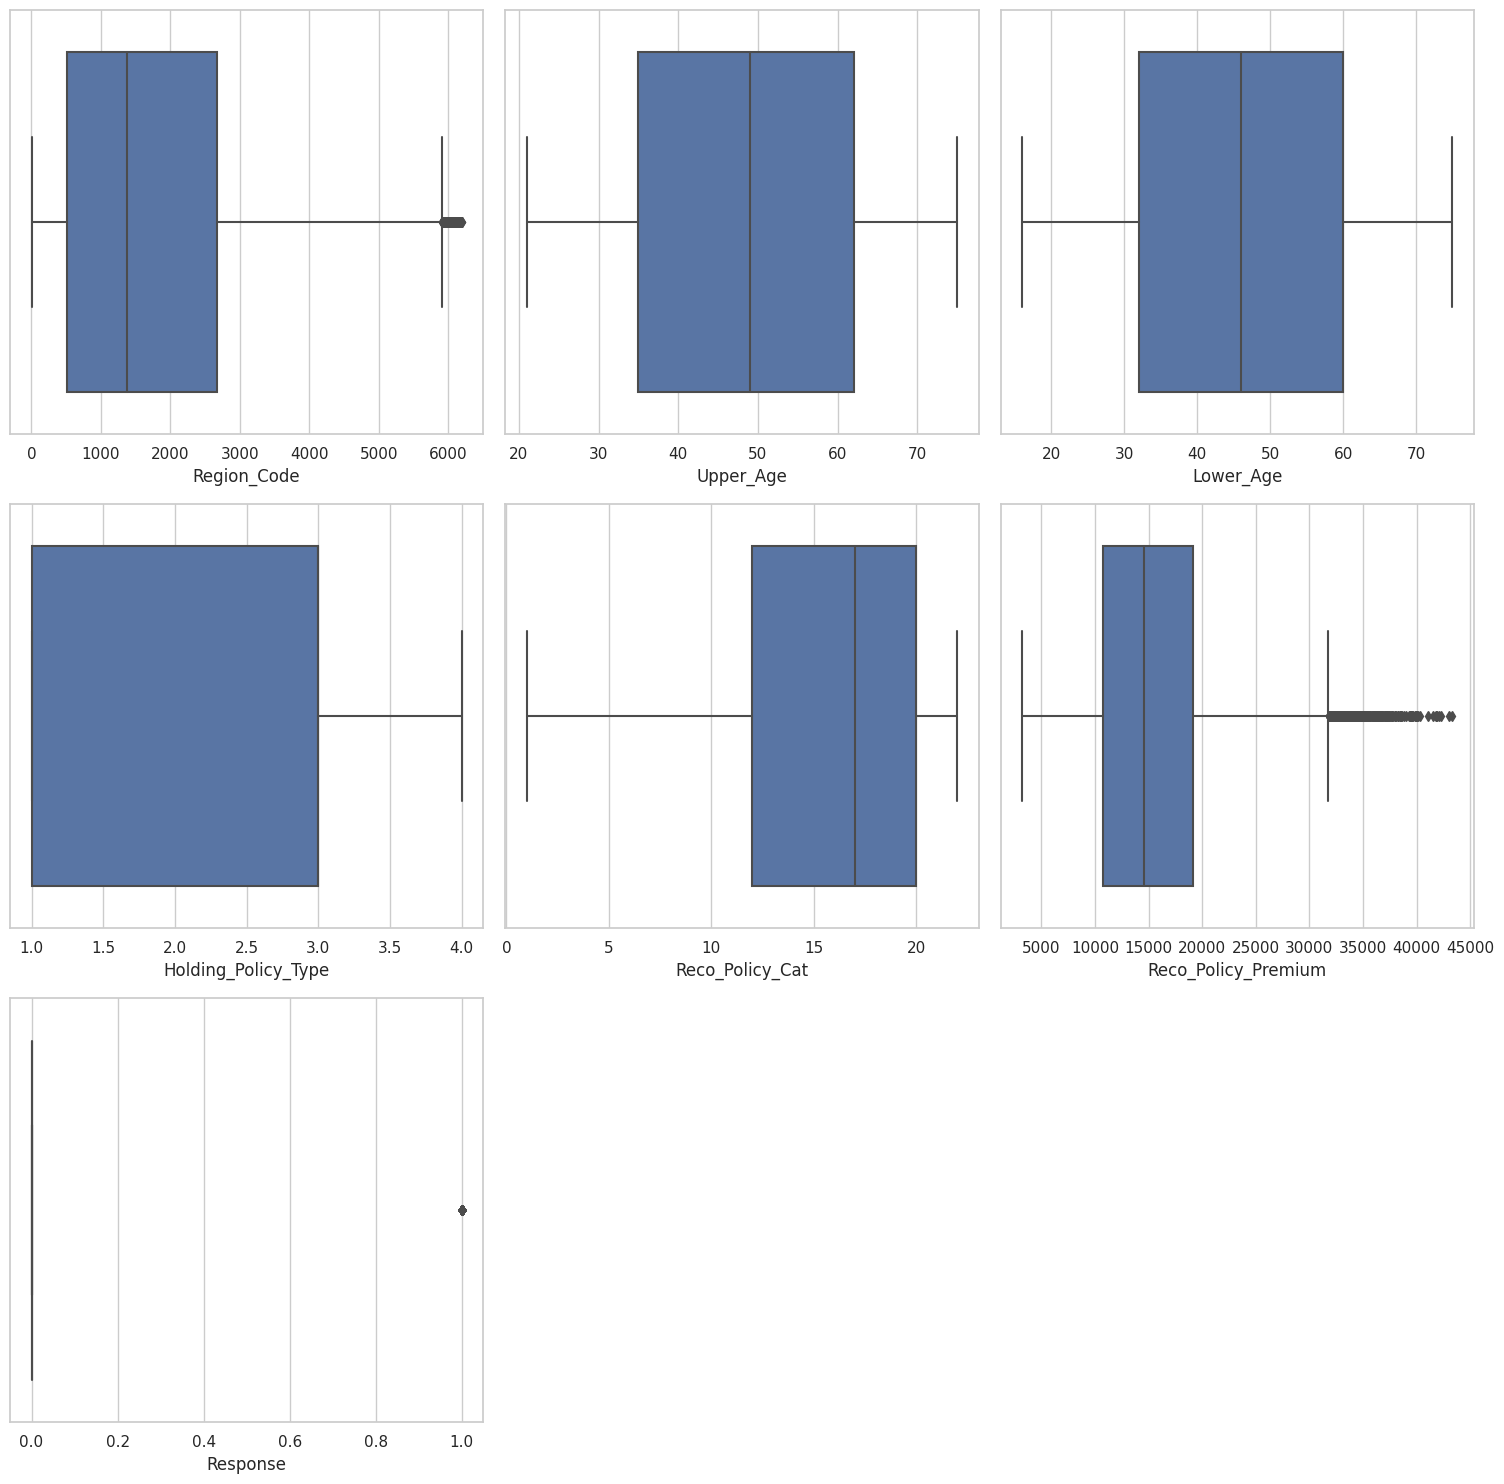

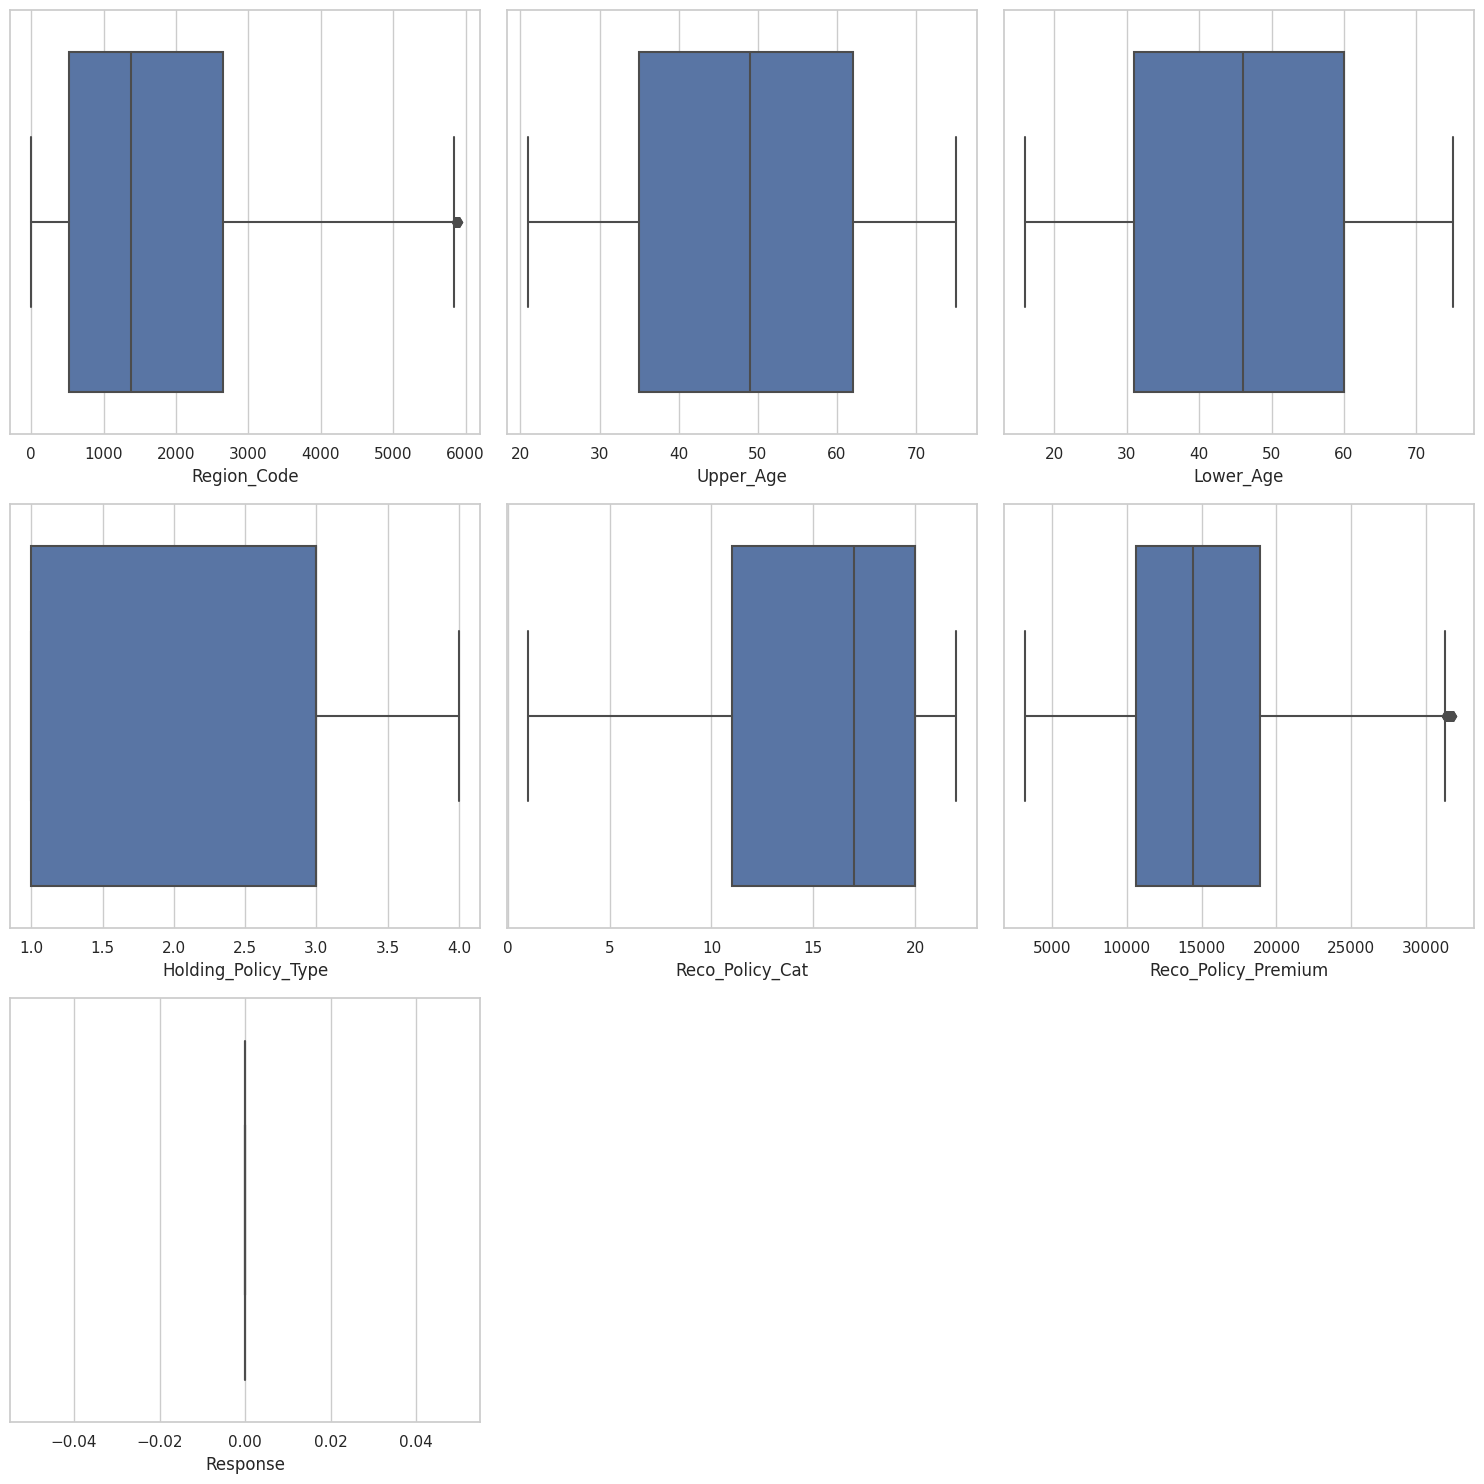

In [ ]:
#****** univariate data analysis ******

#Part_1:Box plots and outliers removal through IQR method

numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns
#Displaying and creating with dynamic layout adjustment
num_cols = len(numerical_cols)
num_rows = 2
num_cols_per_row = 3
num_subplot_rows = math.ceil(num_cols / num_cols_per_row)
plt.figure(figsize=(15, 5 * num_subplot_rows))
sns.set(style="whitegrid")
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

#IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5
df_no_outliers = df[~((df[numerical_cols] < (Q1 - outlier_threshold * IQR)) | (df[numerical_cols] > (Q3 + outlier_threshold * IQR))).any(axis=1)]

#Displaying and creating with dynamic layout adjustment after removal of outliers
plt.figure(figsize=(15, 5 * num_subplot_rows))
sns.set(style="whitegrid")
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)
    sns.boxplot(x=df_no_outliers[col])
plt.tight_layout()
plt.show()

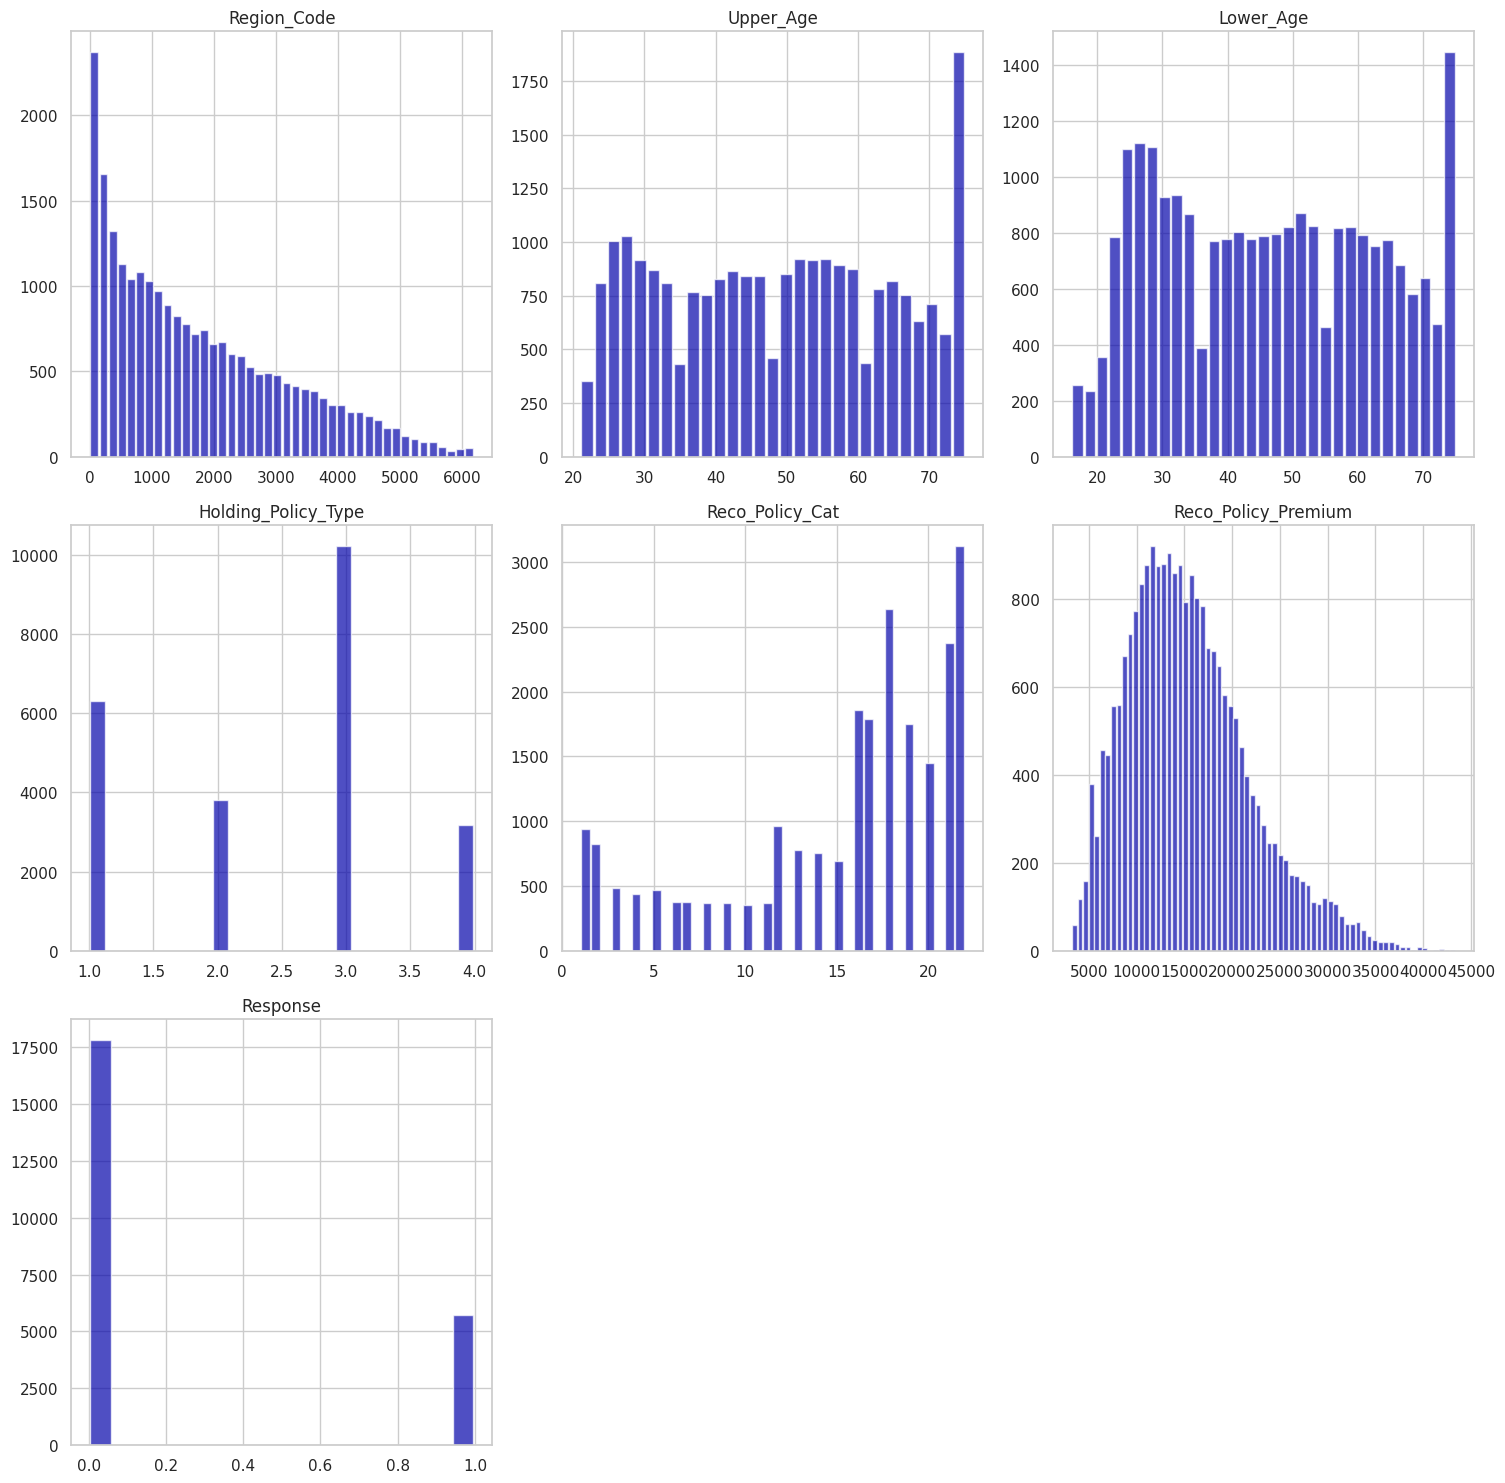

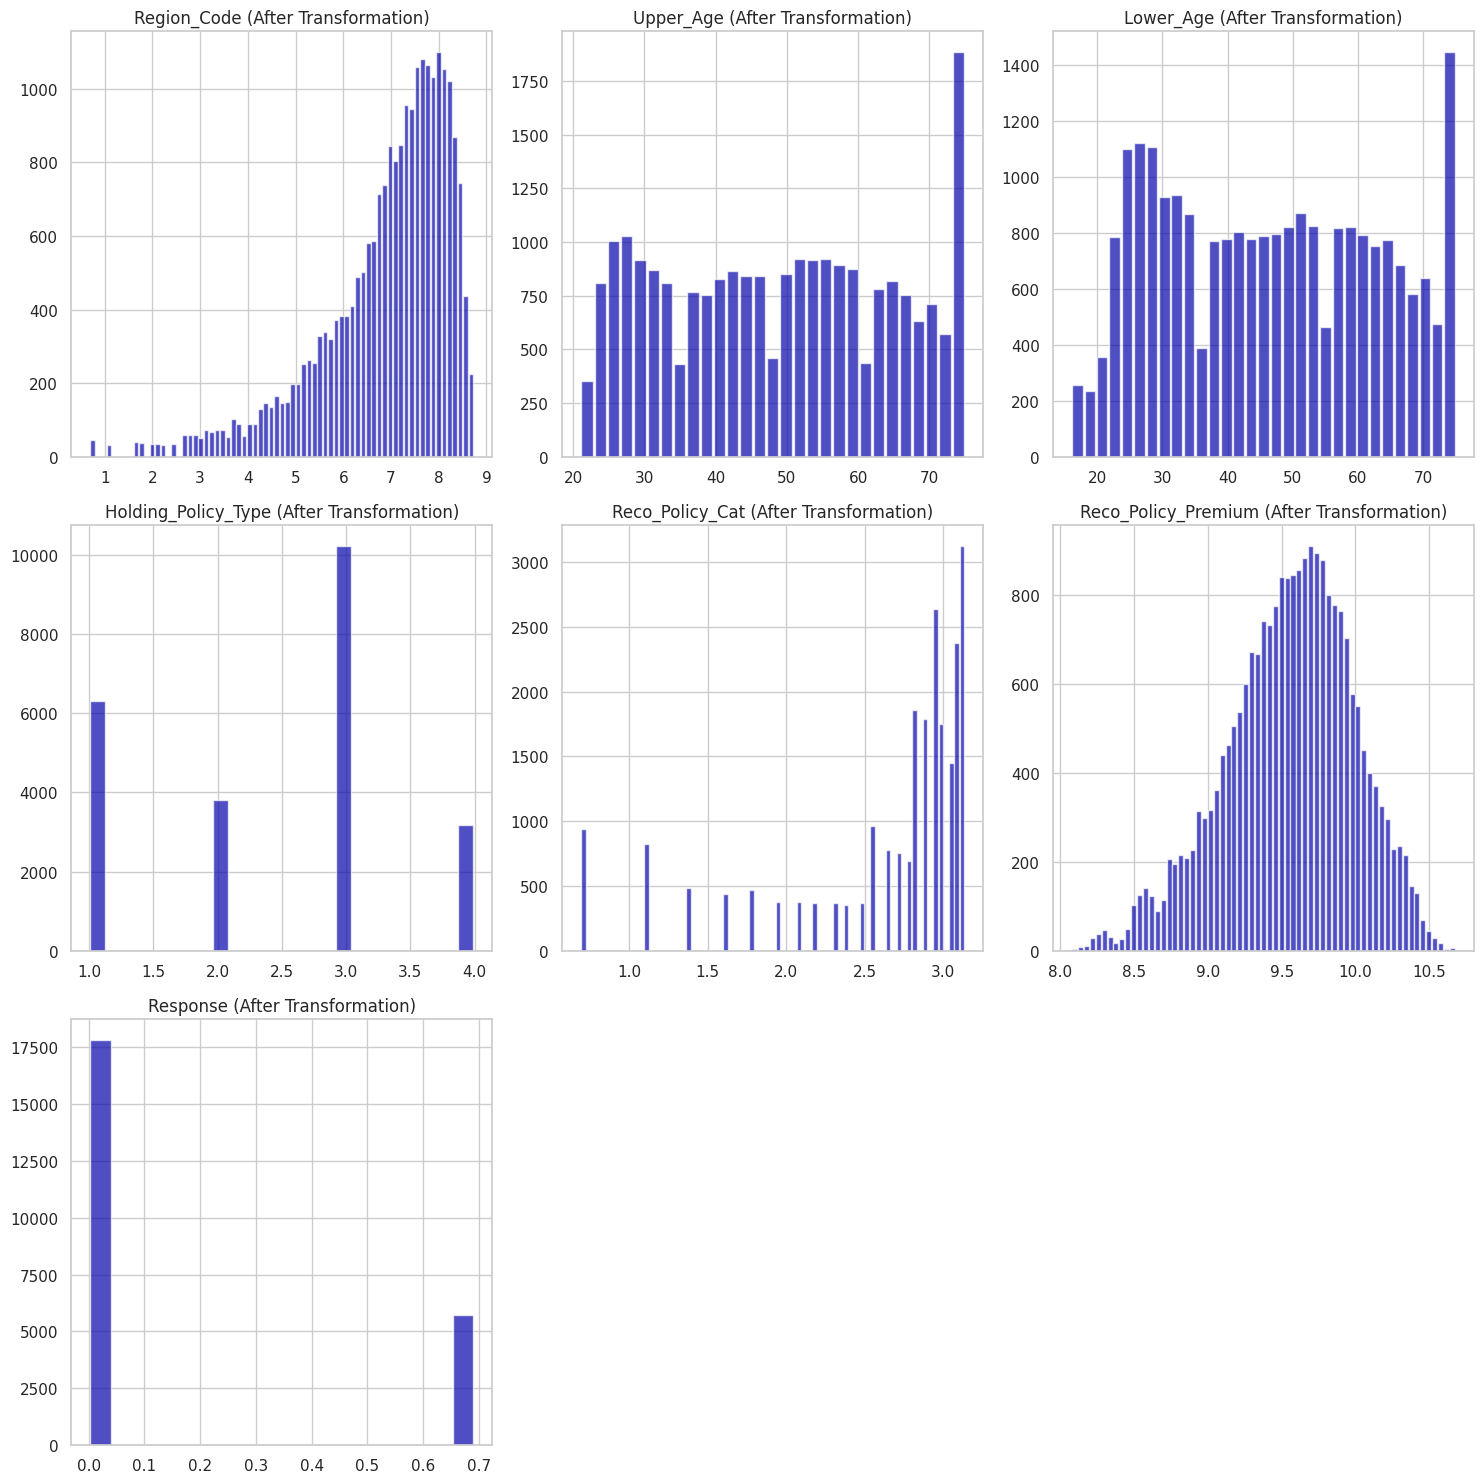

In [ ]:
#part_2:Histogram plot and transformation of skewed columns

# Displaying and creating histogram for numerical columns
plt.figure(figsize=(15, 5 * num_subplot_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)  # Adjust subplot layout dynamically
    plt.hist(df[col], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.title(col)
plt.tight_layout()
plt.show()

# Checking and transforming skewed numerical columns crossing the skewness threshold using logarithmic transformation
skewness_threshold = 0.5
skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_cols = skewed_cols[abs(skewed_cols) > skewness_threshold].index
for col in skewed_cols:
    df[col] = np.log1p(df[col])

# Displaying and creating histograms for numerical columns after transformation is done
plt.figure(figsize=(15, 5 * num_subplot_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)  # Adjusting subplot layout dynamically
    plt.hist(df[col], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.title(col + ' (After Transformation)')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

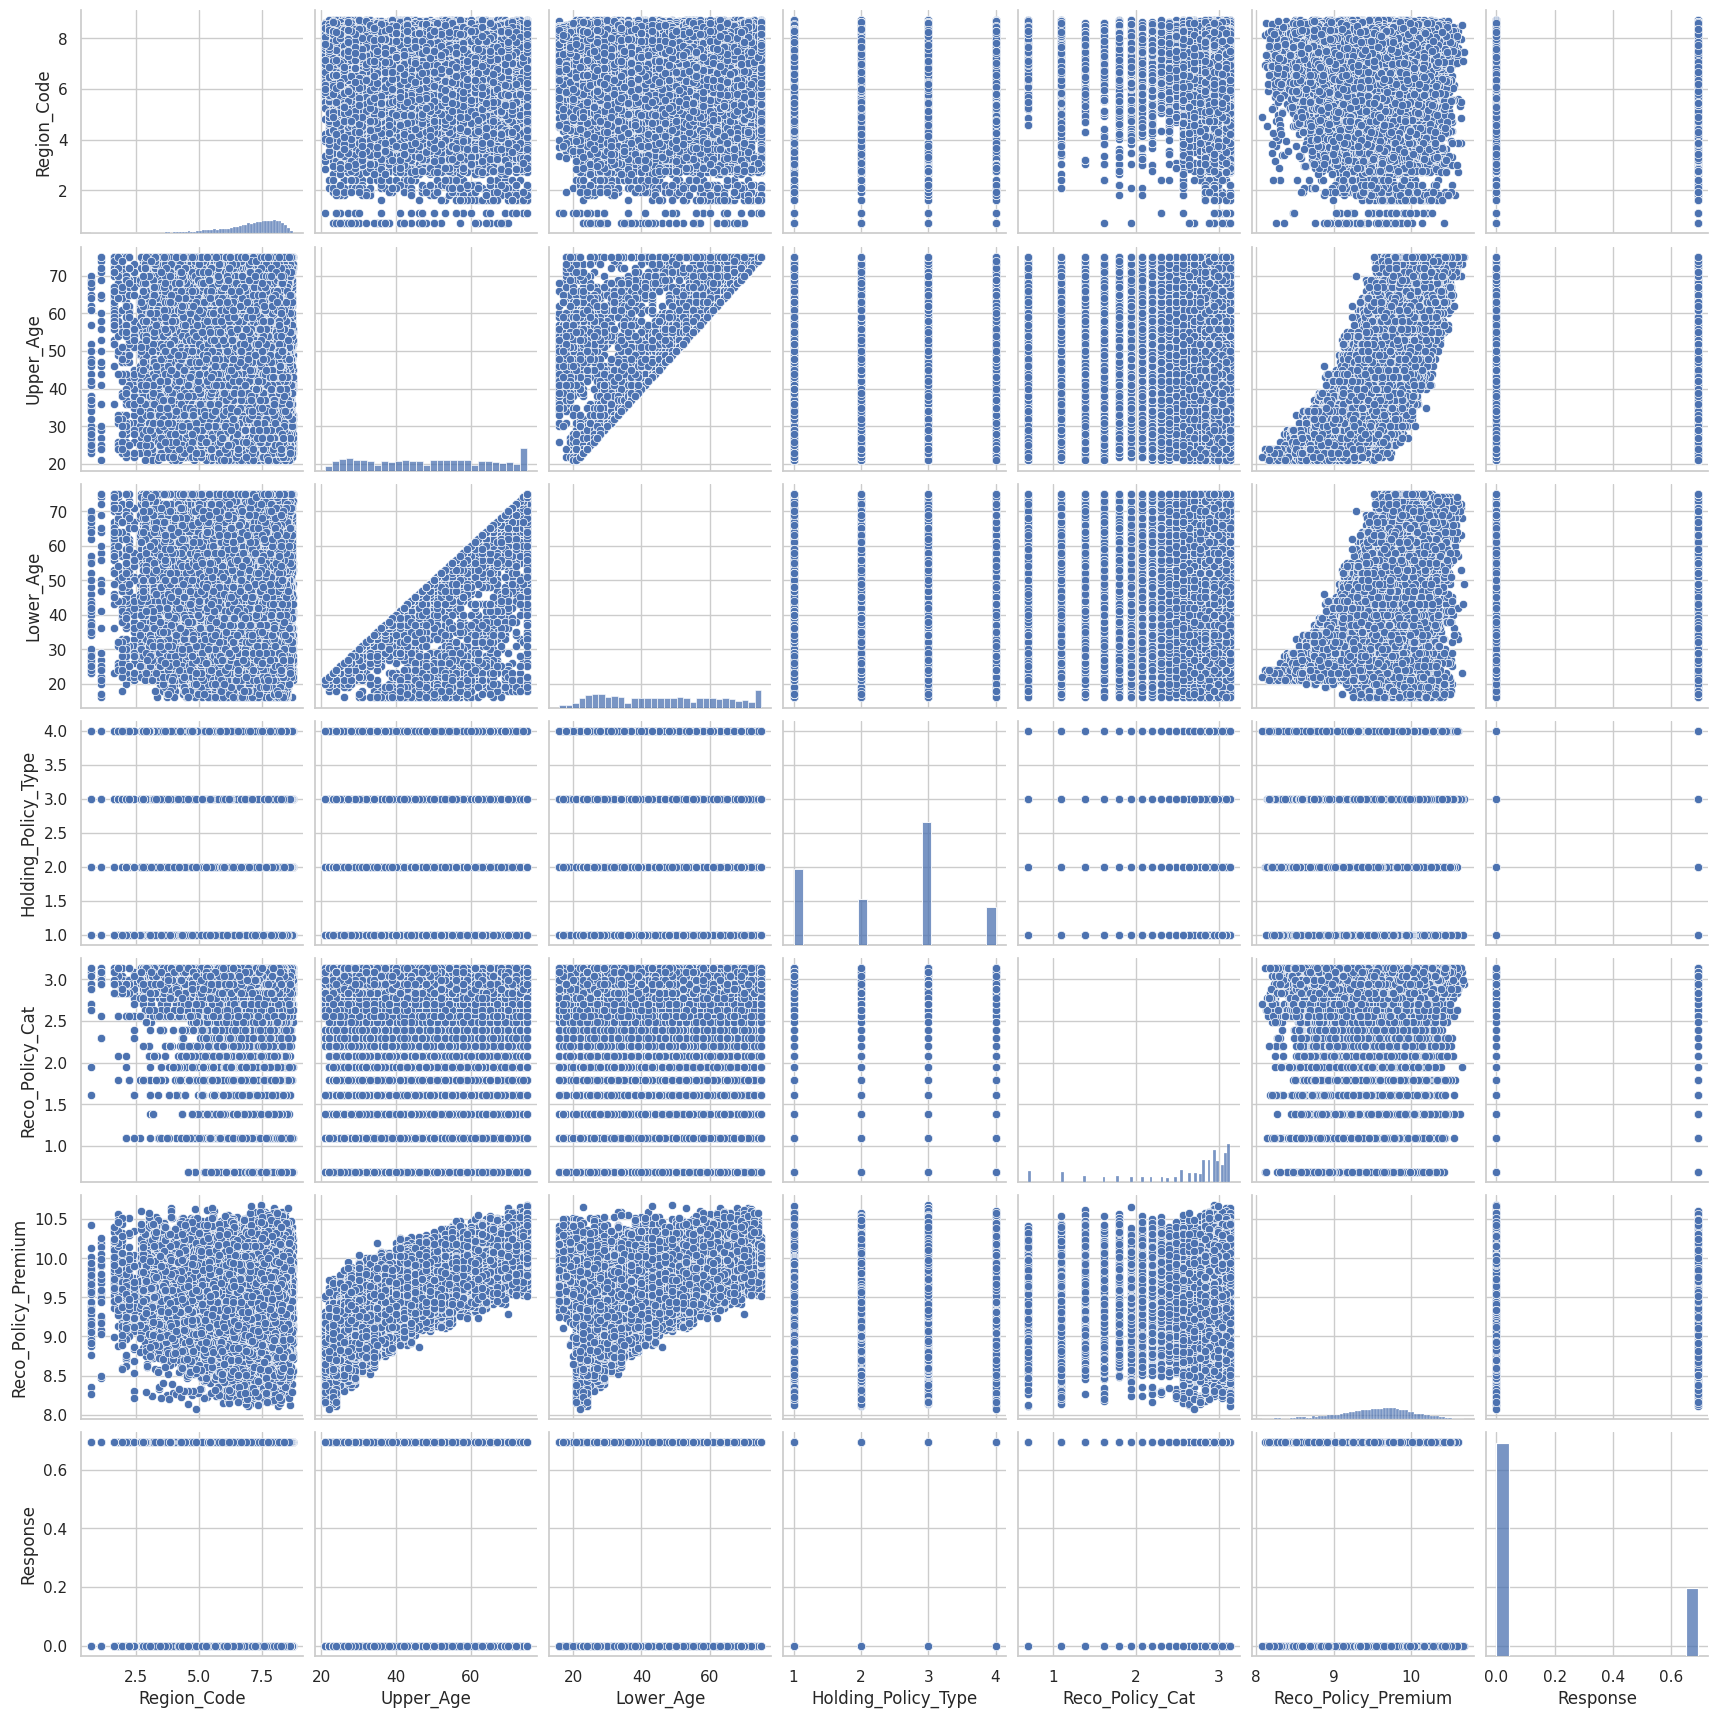

In [ ]:
#****** Bivariate data Analysis ******

#displaying and creating scatter plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
sns.pairplot(df[numerical_cols])
plt.show()

<ipython-input-24-837507dcf561>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


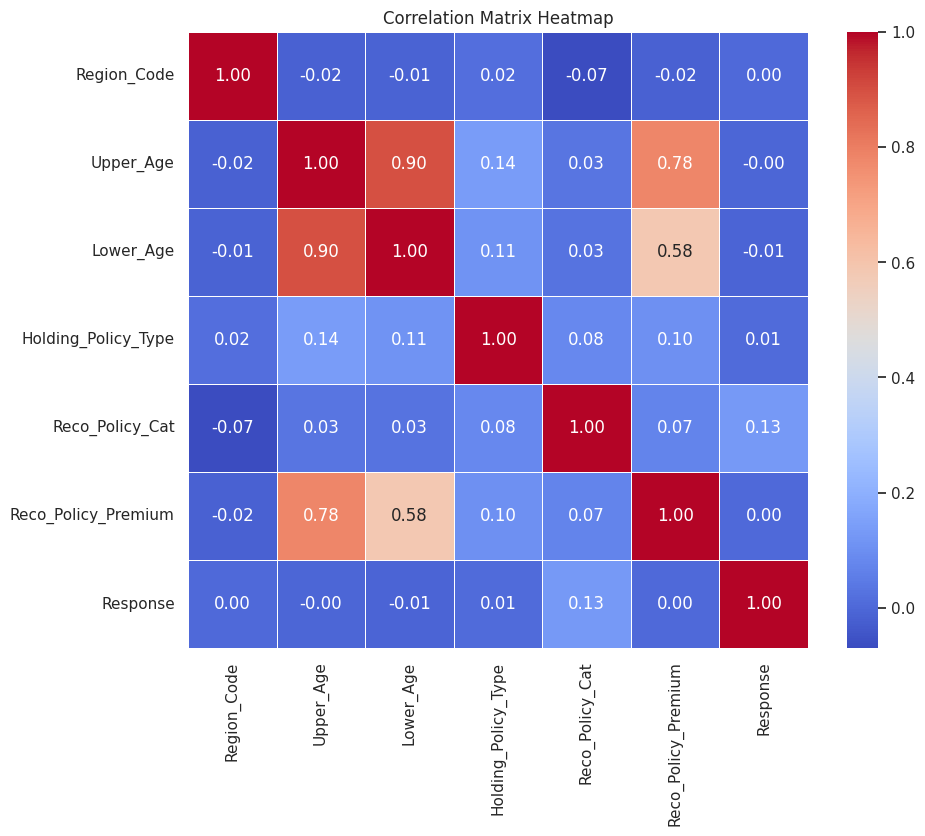

<ipython-input-24-837507dcf561>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_high_correlation.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


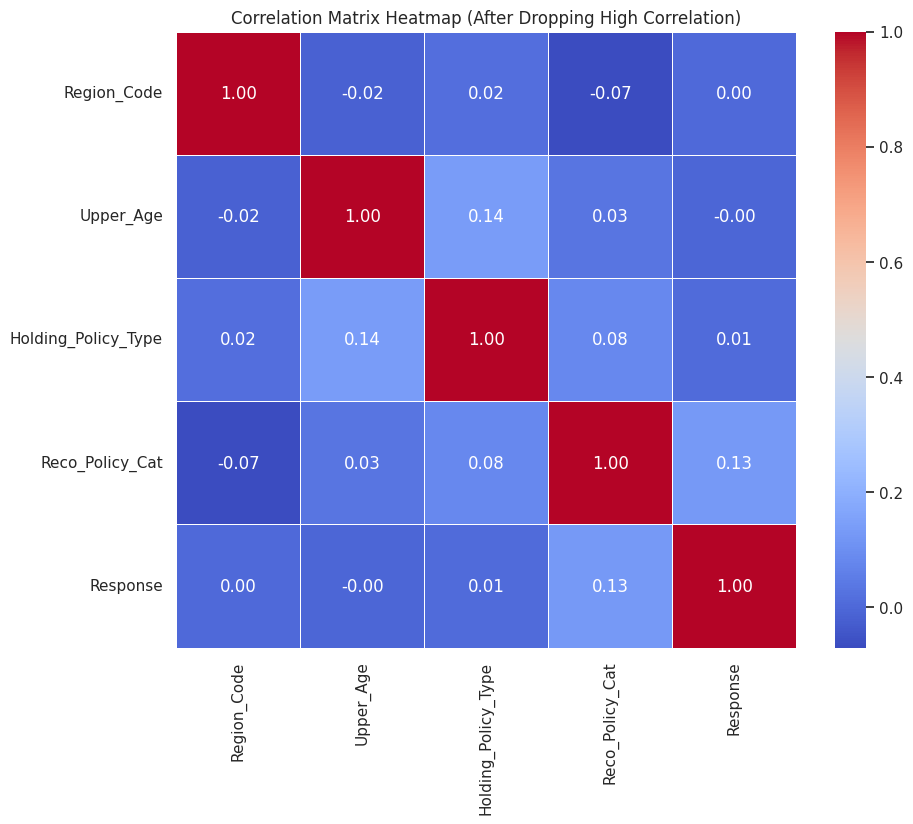

In [ ]:
#****** Multivariate data Analysis ******

# Calculating correlation matrix and displaying its heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identifying and dropping columns with high correlation with the threshold of 0.7
correlation_threshold = 0.7
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_cols.add(colname_j)
df_no_high_correlation = df.drop(columns=highly_correlated_cols)

# Displaying heatmap of the correlation matrix after dropping columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_high_correlation.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (After Dropping High Correlation)")
plt.show()

In [ ]:
#****** Feature Scaling ******

# Identifying numerical columns and doing feature scaling it for them
numerical_cols_for_scaling = df_no_high_correlation.select_dtypes(include='number').columns
scaler = StandardScaler()
df_scaled = df_no_high_correlation.copy()
df_scaled[numerical_cols_for_scaling] = scaler.fit_transform(df_no_high_correlation[numerical_cols_for_scaling])
print(df_scaled.head())

  City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0        C3     0.864955            Rented          Individual  -0.802952   
3       C24     1.088514             Owned               Joint   0.195730   
4        C8     0.588015            Rented          Individual  -0.303611   
5        C9     0.440293            Rented          Individual   0.195730   
7        C1     0.856358             Owned               Joint   1.631334   

  Is_Spouse Health Indicator Holding_Policy_Duration  Holding_Policy_Type  \
0        No               X1                     14+             0.548230   
3        No               X1                     14+             0.548230   
4        No               X2                       3            -1.401291   
5        No               X2                       5            -1.401291   
7       Yes               X4                       9             1.522991   

   Reco_Policy_Cat  Response  
0         0.768904 -0.565123  
3         0.

In [ ]:
#****** Models and prediction evaluation ******

# Assuming 'Response' is originally a continuous variable
df_scaled['Response'] = df_scaled['Response'].astype(int)  # Convert to integer
df_scaled['Response'] = df_scaled['Response'].astype('category')  # Convert to categorical

# Separating features and target variable
X = df_scaled.drop('Response', axis=1)
y = df_scaled['Response']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)
    ],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_encoded, y_train)

# Predictions on the test and train set
y_pred_dt = dt_classifier.predict(X_test_encoded)
y_train_pred_dt = dt_classifier.predict(X_train_encoded)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Predictions on the test and train set
y_pred_rf = rf_classifier.predict(X_test_encoded)
y_train_pred_rf = rf_classifier.predict(X_train_encoded)

# Evaluating models on training set
print("Decision Tree Classifier (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Classification Report:\n", classification_report(y_train, y_train_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_dt))

print("\nRandom Forest Classifier (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Classification Report:\n", classification_report(y_train, y_train_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_rf))

# Evaluating models on testing set
print("\nDecision Tree Classifier (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

print("\nRandom Forest Classifier (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Decision Tree Classifier (Training Set):
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14284
           1       1.00      1.00      1.00      4554

    accuracy                           1.00     18838
   macro avg       1.00      1.00      1.00     18838
weighted avg       1.00      1.00      1.00     18838

Confusion Matrix:
 [[14284     0]
 [    0  4554]]

Random Forest Classifier (Training Set):
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14284
           1       1.00      1.00      1.00      4554

    accuracy                           1.00     18838
   macro avg       1.00      1.00      1.00     18838
weighted avg       1.00      1.00      1.00     18838

Confusion Matrix:
 [[14284     0]
 [    0  4554]]

Decision Tree Classifier (Testing Set):
Accuracy: 0.6581740976645435
Classification Re

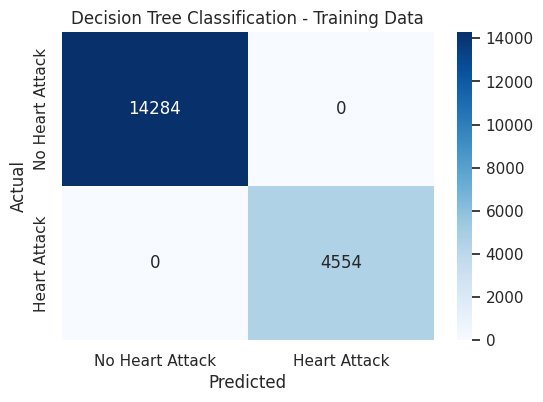

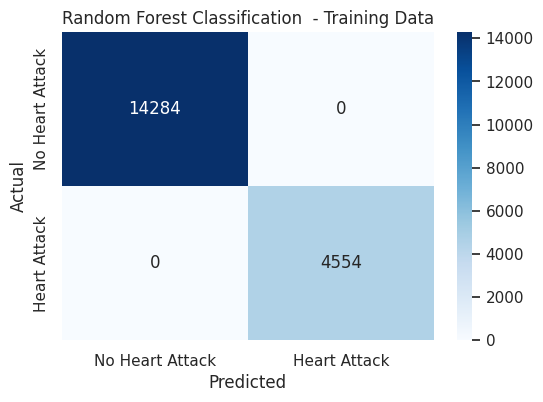

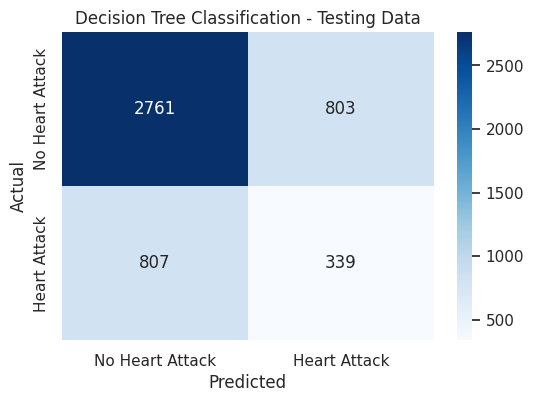

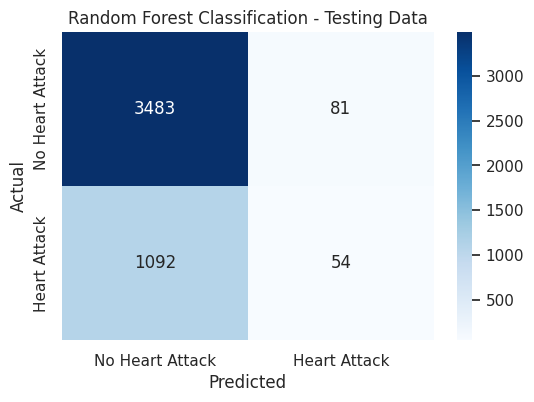

In [ ]:
#****** Confusion Matrix Plot ******

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion(y_train, y_train_pred_dt, 'Decision Tree Classification - Training Data')
plot_confusion(y_train, y_train_pred_rf, 'Random Forest Classification  - Training Data')
plot_confusion(y_test, y_pred_dt, 'Decision Tree Classification - Testing Data')
plot_confusion(y_test, y_pred_rf, 'Random Forest Classification - Testing Data')

In [ ]:
#****** K-Fold cross validation (accuracy Testing) ******

# defining cross validation
num_folds = 5
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
dt_cv_scores_train = cross_val_score(dt_classifier, X_train_encoded, y_train, cv=cv_strategy, scoring='accuracy')
rf_cv_scores_train = cross_val_score(rf_classifier, X_train_encoded, y_train, cv=cv_strategy, scoring='accuracy')
dt_cv_scores_test = cross_val_score(dt_classifier, X_test_encoded, y_test, cv=cv_strategy, scoring='accuracy')
rf_cv_scores_test = cross_val_score(rf_classifier, X_test_encoded, y_test, cv=cv_strategy, scoring='accuracy')

# Displaying the results
print("Decision Tree Classifier - Cross-validation scores (Training Set):", dt_cv_scores_train)
print("Average Accuracy (Training Set):", dt_cv_scores_train.mean())
print("\nRandom Forest Classifier - Cross-validation scores (Training Set):", rf_cv_scores_train)
print("Average Accuracy (Training Set):", rf_cv_scores_train.mean())
print("\nDecision Tree Classifier - Cross-validation scores (Testing Set):", dt_cv_scores_test)
print("Average Accuracy (Testing Set):", dt_cv_scores_test.mean())
print("\nRandom Forest Classifier - Cross-validation scores (Testing Set):", rf_cv_scores_test)
print("Average Accuracy (Testing Set):", rf_cv_scores_test.mean())

Decision Tree Classifier - Cross-validation scores (Training Set): [0.67038217 0.66454352 0.6616242  0.67188744 0.65834882]
Average Accuracy (Training Set): 0.6653572312241125

Random Forest Classifier - Cross-validation scores (Training Set): [0.75504246 0.7537155  0.75610403 0.75444651 0.75471197]
Average Accuracy (Training Set): 0.7548040954608042

Decision Tree Classifier - Cross-validation scores (Testing Set): [0.65711253 0.66135881 0.66454352 0.67622081 0.6507431 ]
Average Accuracy (Testing Set): 0.661995753715499

Random Forest Classifier - Cross-validation scores (Testing Set): [0.74840764 0.74840764 0.7537155  0.74309979 0.74734607]
Average Accuracy (Testing Set): 0.7481953290870488


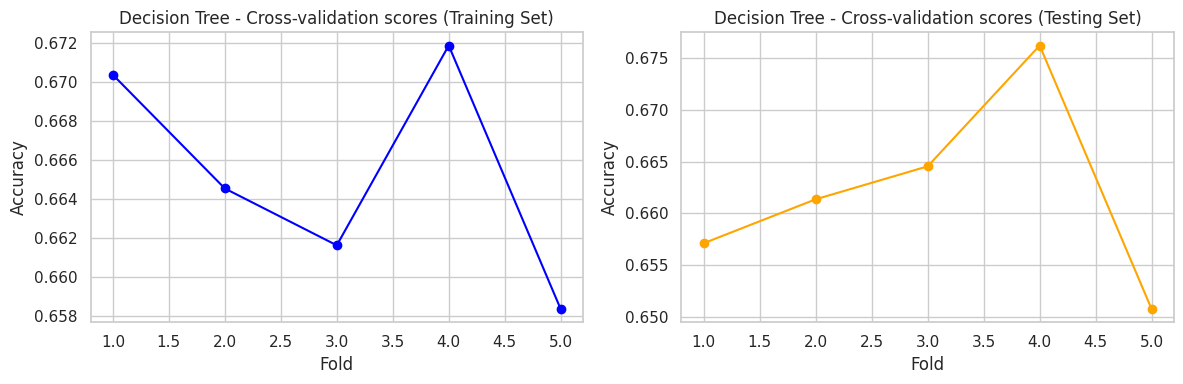

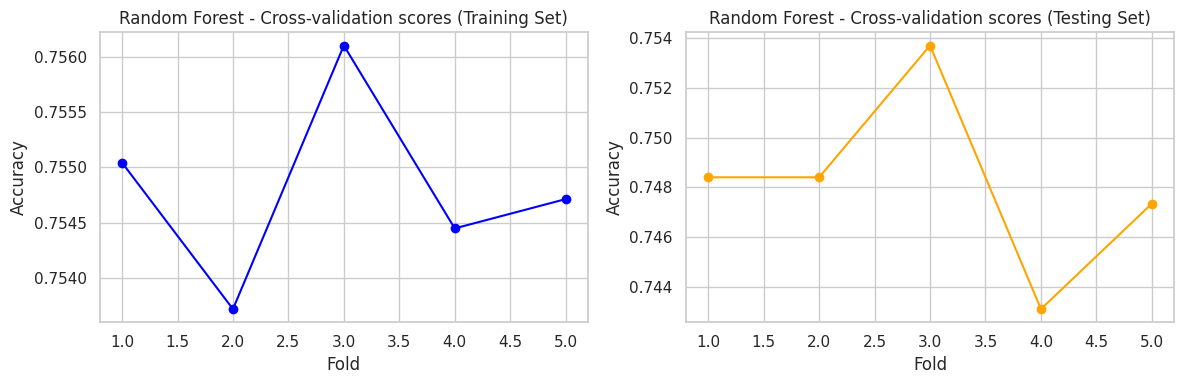

In [ ]:
#****** Plotting K-Fold cross validation results ******

def plot_cross_val_results(cv_scores_train, cv_scores_test, classifier_name):
    plt.figure(figsize=(12, 4))
    for i, (cv_scores, dataset_name) in enumerate(zip([cv_scores_train, cv_scores_test], ['Training Set', 'Testing Set']), start=1):
        plt.subplot(1, 2, i)
        plt.plot(np.arange(1, num_folds + 1), cv_scores, marker='o', linestyle='-', color='blue' if dataset_name == 'Training Set' else 'orange')
        plt.title(f'{classifier_name} - Cross-validation scores ({dataset_name})')
        plt.xlabel('Fold')
        plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()

plot_cross_val_results(dt_cv_scores_train, dt_cv_scores_test, 'Decision Tree')
plot_cross_val_results(rf_cv_scores_train, rf_cv_scores_test, 'Random Forest')